# Mutation in GO Biological Process Term Enrichment 

In [20]:
import pandas as pd
muts = pd.read_csv('../data/muts_eight_cohorts_oncotated.txt')

In [12]:
mut_orig_cols = ['patient', 'Chromosome', 'Start_position', 'Reference_Allele', 'Tumor_Seq_Allele2']
mut_rename_cols = {
    "Chromosome":"chr", 
    'Start_position':"pos", 
    'Reference_Allele':"ref", 
    'Tumor_Seq_Allele2':"alt"
}
muts = muts[muts['Variant_Type']=="SNP"][mut_orig_cols].rename(columns=mut_rename_cols)

In [18]:
muts.to_csv('../data/muts_eight_cohorts_oncotated_intermediates.txt', index=False)

# KMeans Clustering before PCA

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

go_muts = pd.read_csv('../data/biol_enr_patient.txt', sep="\t")
go_data = go_muts[list(filter(lambda x: x!='go', go_muts.columns))].astype(float)
stdize_go_data = StandardScaler().fit_transform(go_data)

kscores = []
for i in range(1,50):
    km = KMeans(i)
    km.fit(stdize_go_data)
    kscores.append(km.score(stdize_go_data))

Populating the interactive namespace from numpy and matplotlib


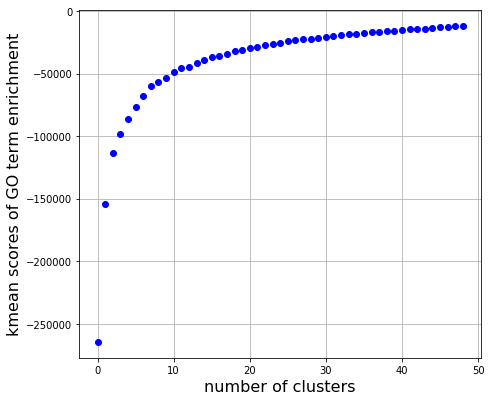

In [76]:
% pylab inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7.2,6.4)) 
plt.plot(range(len(kscores)), kscores, 'bo')
plt.grid('on')
plt.xlabel('number of clusters', fontsize=16)
plt.ylabel('kmean scores of GO term enrichment', fontsize=16)

10 clusters seems to get us good scores

# KMeans Clustering after PCA

In [85]:
# from sklearn.decomposition import PCA
# go_pca = PCA(n_components=100)
# go_pca.fit(stdize_go_data)
# transformed_go = go_pca.transform(stdize_go_data)
go_pca_20 = transformed_go[:, :20]

(481, 20)

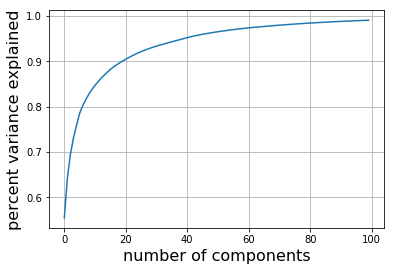

In [75]:
plt.plot(range(len(go_pca.explained_variance_ratio_)), go_pca.explained_variance_ratio_.cumsum())
plt.xlabel('number of components', fontsize=16)
plt.ylabel('percent variance explained', fontsize=16)
plt.grid('on')

20 components yield ~90% variance

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

kscores_pca = []
for i in range(1,50):
    km = KMeans(i)
    km.fit(go_pca_20)
    kscores_pca.append(km.score(go_pca_20))

Populating the interactive namespace from numpy and matplotlib


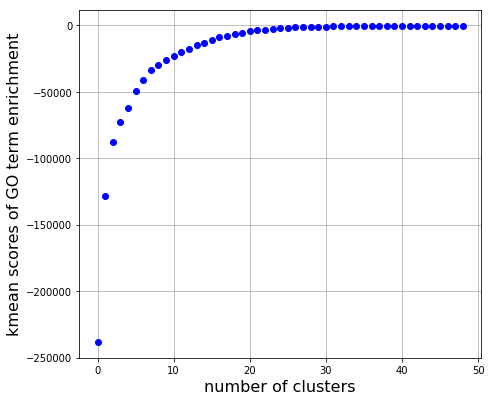

In [87]:
% pylab inline
import matplotlib.pyplot as plt
plt.figure(figsize=(7.2,6.4)) 
plt.plot(range(len(kscores_pca)), kscores_pca, 'bo')
plt.grid('on')
plt.xlabel('number of clusters', fontsize=16)
plt.ylabel('kmean scores of GO term enrichment after PCA', fontsize=16)

In [129]:
final_num_components = 7
go_pca20_clustered = KMeans(final_num_components).fit(go_pca_20)
y_pred = KMeans(final_num_components).fit_predict(go_pca_20)

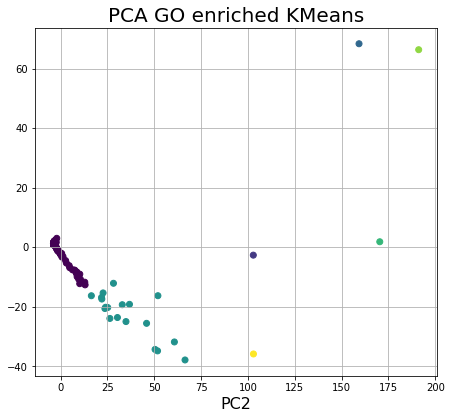

In [139]:
plt.figure(figsize=(7.2,6.4)) 
plt.scatter(go_pca_20[:, 0], go_pca_20[:, 1], c=y_pred)
plt.title("PCA GO enriched KMeans", fontsize=20)
plt.xlabel("PC1", fontsize=16)
plt.xlabel("PC2", fontsize=16)
plt.grid('on')

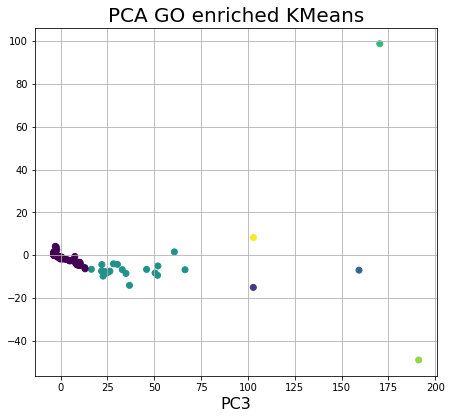

In [141]:
plt.figure(figsize=(7.2,6.4)) 
plt.scatter(go_pca_20[:, 0], go_pca_20[:, 2], c=y_pred)
plt.title("PCA GO enriched KMeans", fontsize=20)
plt.xlabel("PC1", fontsize=16)
plt.xlabel("PC3", fontsize=16)
plt.grid('on')

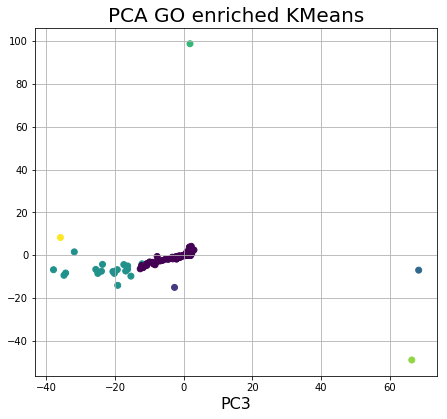

In [142]:
plt.figure(figsize=(7.2,6.4)) 
plt.scatter(go_pca_20[:, 1], go_pca_20[:, 2], c=y_pred)
plt.title("PCA GO enriched KMeans", fontsize=20)
plt.xlabel("PC2", fontsize=16)
plt.xlabel("PC3", fontsize=16)
plt.grid('on')